# БФИ2001 Фаттахов Тагир

## Лабораторная работа №3 (Регрессионная модель изменения цен на дома в Бостоне)

In [1]:
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
import matplotlib.pyplot as plt

Загрузка набора данных

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print(train_data.shape)
print(test_data.shape)
print(test_targets)

(404, 13)
(102, 13)
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]


Нормализация данных

In [3]:
mean = train_data.mean(axis=0)
train_data -= mean
test_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data /= std

Функция создания архитектуры ИНС и ее инициализация

In [4]:
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

Перекрестная проверка по 4 блокам с количеством эпох равной 50

In [5]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 50
all_scores = []
history = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    loc_hist = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    history.append(loc_hist)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print(np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.3477743268013


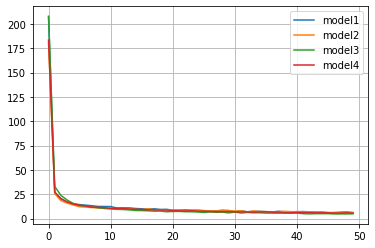

In [6]:
plt.plot(history[0].history['loss'], label = 'model1')
plt.plot(history[1].history['loss'], label = 'model2')
plt.plot(history[2].history['loss'], label = 'model3')
plt.plot(history[3].history['loss'], label = 'model4')
plt.grid(True)
plt.legend()
plt.show()

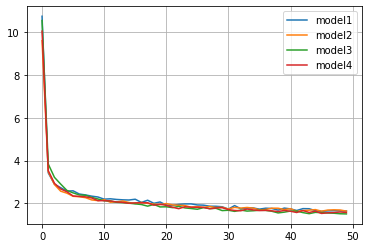

In [7]:
plt.plot(history[0].history['mae'], label = 'model1')
plt.plot(history[1].history['mae'], label = 'model2')
plt.plot(history[2].history['mae'], label = 'model3')
plt.plot(history[3].history['mae'], label = 'model4')
plt.grid(True)
plt.legend()
plt.show()

Перекрестная проверка по 4 блокам с количеством эпох равной 100

In [8]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
history = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    loc_hist = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    history.append(loc_hist)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print(np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.453542113304138


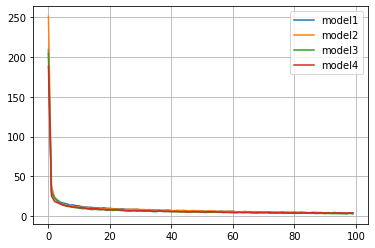

In [9]:
plt.plot(history[0].history['loss'], label = 'model1')
plt.plot(history[1].history['loss'], label = 'model2')
plt.plot(history[2].history['loss'], label = 'model3')
plt.plot(history[3].history['loss'], label = 'model4')
plt.grid(True)
plt.legend()
plt.show()

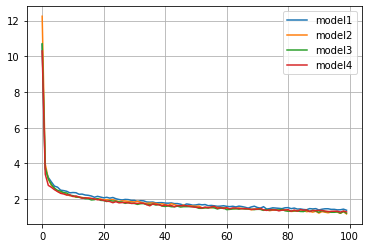

In [10]:
plt.plot(history[0].history['mae'], label = 'model1')
plt.plot(history[1].history['mae'], label = 'model2')
plt.plot(history[2].history['mae'], label = 'model3')
plt.plot(history[3].history['mae'], label = 'model4')
plt.grid(True)
plt.legend()
plt.show()

Перекрестная проверка по 4 блокам с количеством эпох равной 150

In [11]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 150
all_scores = []
history = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    loc_hist = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    history.append(loc_hist)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print(np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.5951196551322937


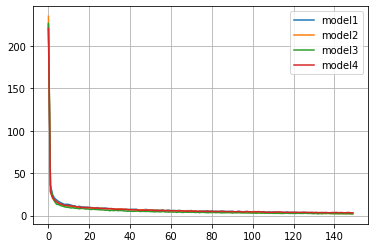

In [12]:
plt.plot(history[0].history['loss'], label = 'model1')
plt.plot(history[1].history['loss'], label = 'model2')
plt.plot(history[2].history['loss'], label = 'model3')
plt.plot(history[3].history['loss'], label = 'model4')
plt.grid(True)
plt.legend()
plt.show()

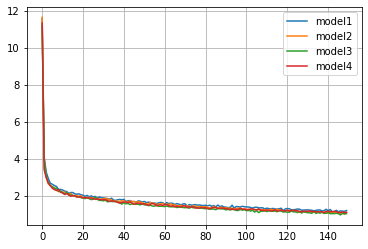

In [13]:
plt.plot(history[0].history['mae'], label = 'model1')
plt.plot(history[1].history['mae'], label = 'model2')
plt.plot(history[2].history['mae'], label = 'model3')
plt.plot(history[3].history['mae'], label = 'model4')
plt.grid(True)
plt.legend()
plt.show()

Перекрестная проверка по 3 блокам с количеством эпох равной 100

In [14]:
k = 3
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
history = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    loc_hist = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    history.append(loc_hist)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print(np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
2.4677327473958335


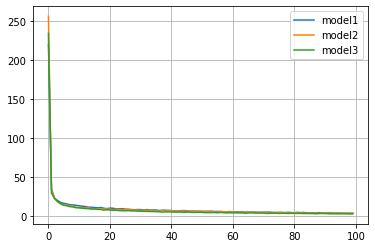

In [15]:
plt.plot(history[0].history['loss'], label = 'model1')
plt.plot(history[1].history['loss'], label = 'model2')
plt.plot(history[2].history['loss'], label = 'model3')
plt.grid(True)
plt.legend()
plt.show()

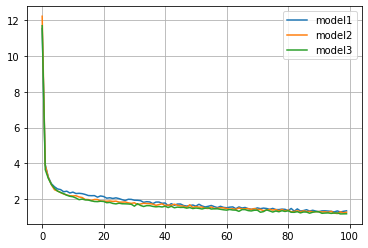

In [16]:
plt.plot(history[0].history['mae'], label = 'model1')
plt.plot(history[1].history['mae'], label = 'model2')
plt.plot(history[2].history['mae'], label = 'model3')
plt.grid(True)
plt.legend()
plt.show()

Перекрестная проверка по 5 блокам с количеством эпох равной 100

In [19]:
k = 5
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
history = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    loc_hist = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    history.append(loc_hist)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print(np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
2.439377689361572


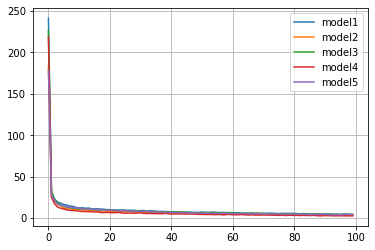

In [20]:
plt.plot(history[0].history['loss'], label = 'model1')
plt.plot(history[1].history['loss'], label = 'model2')
plt.plot(history[2].history['loss'], label = 'model3')
plt.plot(history[3].history['loss'], label = 'model4')
plt.plot(history[4].history['loss'], label = 'model5')
plt.grid(True)
plt.legend()
plt.show()

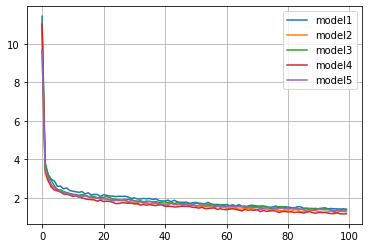

In [21]:
plt.plot(history[0].history['mae'], label = 'model1')
plt.plot(history[1].history['mae'], label = 'model2')
plt.plot(history[2].history['mae'], label = 'model3')
plt.plot(history[3].history['mae'], label = 'model4')
plt.plot(history[4].history['mae'], label = 'model5')
plt.grid(True)
plt.legend()
plt.show()

Вывод: